# Data Science & Business Analyst Intern from The Sparks Foundation

![](Task-2.jpg)

# Author:    D.Sathyakala

# Task - 2 : Prediction Using Unsupervised Learning - Iris Flower classification

In [1]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Find the Shape of the data
df.shape

(150, 6)

In [4]:
# Find the length of the data
len(df)

150

In [5]:
# Data types of the dataframe
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# Check the duplicates
df.duplicated().sum()

0

In [7]:
# Check the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# data grouped by species
data = df.groupby('Species')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [9]:
# Get dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# Details of the data frame
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# Get the count of each species category
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

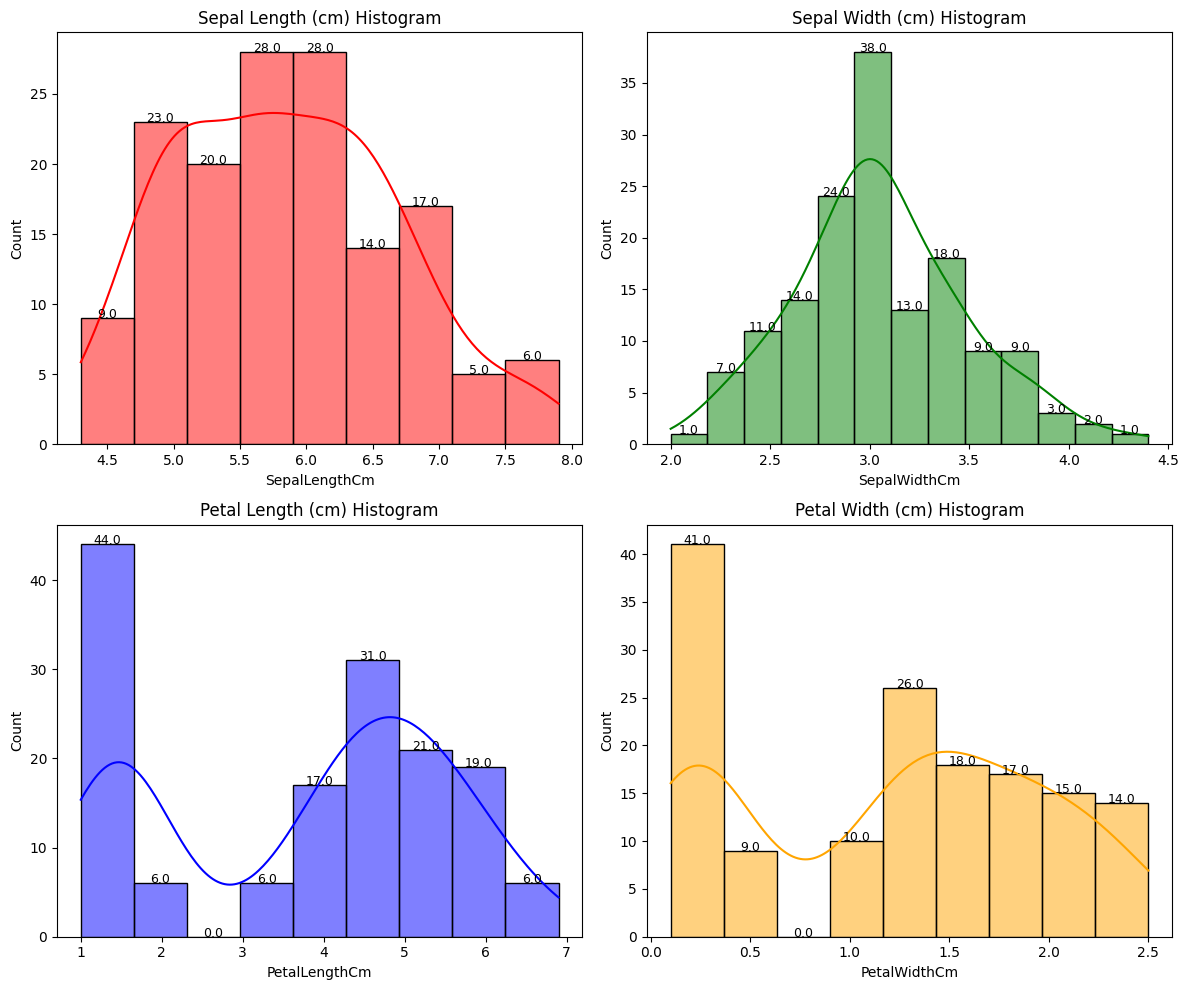

In [12]:
# Create separate histograms
plt.figure(figsize=(12, 10))

# Function to add value labels
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=9, color='black')

# Sepal Length Histogram
plt.subplot(2, 2, 1)
ax1 = sns.histplot(data=df, x="SepalLengthCm", kde=True, color='Red')
plt.title("Sepal Length (cm) Histogram")
add_value_labels(ax1)

# Sepal Width Histogram
plt.subplot(2, 2, 2)
ax2 = sns.histplot(data=df, x="SepalWidthCm", kde=True, color='Green')
plt.title("Sepal Width (cm) Histogram")
add_value_labels(ax2)

# Petal Length Histogram
plt.subplot(2, 2, 3)
ax3 = sns.histplot(data=df, x="PetalLengthCm", kde=True, color='Blue')
plt.title("Petal Length (cm) Histogram")
add_value_labels(ax3)

# Petal Width Histogram
plt.subplot(2, 2, 4)
ax4 = sns.histplot(data=df, x="PetalWidthCm", kde=True, color='orange')
plt.title("Petal Width (cm) Histogram")
add_value_labels(ax4)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


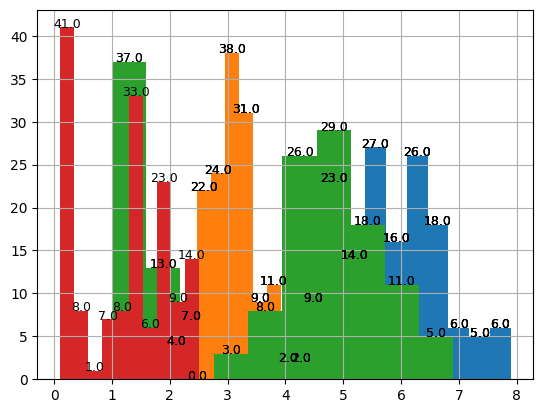

In [13]:
# Function to add value labels
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=9, color='black')
        
# All details in one histogram
a = df['SepalLengthCm'].hist()
add_value_labels(a)
b = df['SepalWidthCm'].hist()
add_value_labels(b)
c = df['PetalLengthCm'].hist()
add_value_labels(c)
d = df['PetalWidthCm'].hist()
add_value_labels(d)


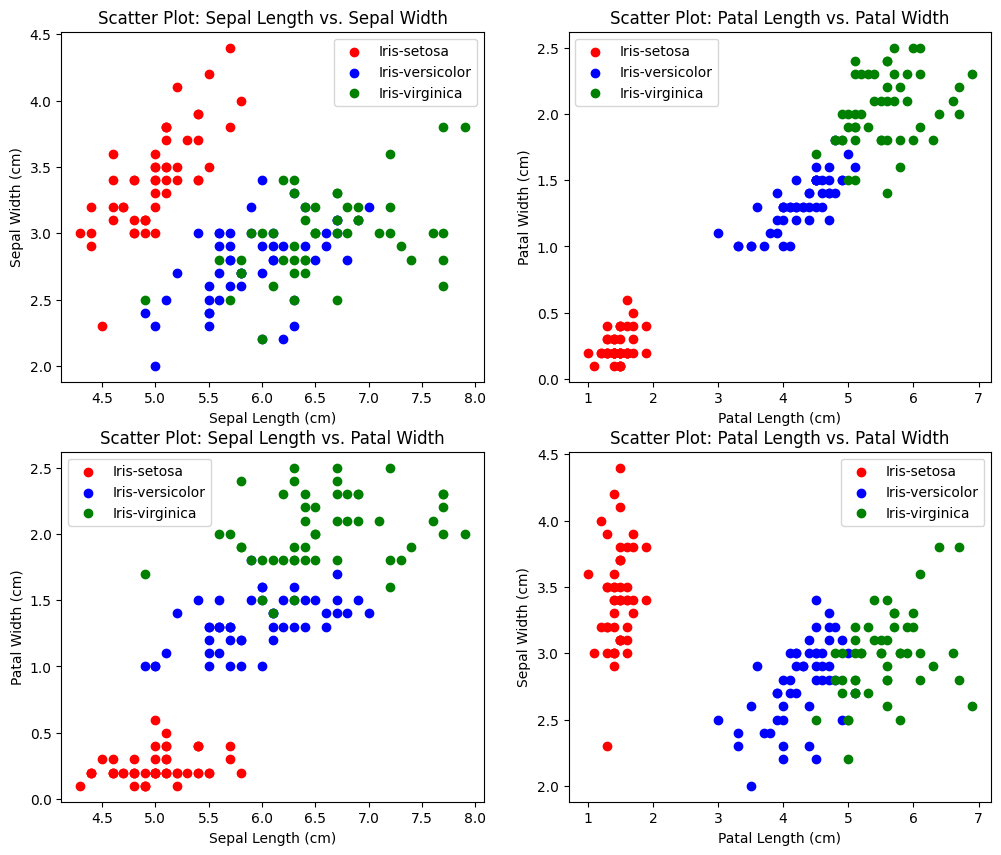

In [14]:
color = ['red', 'blue', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Create separate scatter plot
plt.figure(figsize=(12, 10))

# Create a scatter plot for Sepal Length vs. Sepal Width
plt.subplot(2, 2, 1)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x["SepalLengthCm"], x["SepalWidthCm"], c=color[i], label=species[i])

plt.title("Scatter Plot: Sepal Length vs. Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()

# Create a scatter plot for Patal Length vs. Patal Width
plt.subplot(2, 2, 2)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x["PetalLengthCm"], x["PetalWidthCm"], c=color[i], label=species[i])

plt.title("Scatter Plot: Patal Length vs. Patal Width")
plt.xlabel("Patal Length (cm)")
plt.ylabel("Patal Width (cm)")
plt.legend()

# Create a scatter plot for Sepal Length vs. Patal Width
plt.subplot(2, 2, 3)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x["SepalLengthCm"], x["PetalWidthCm"], c=color[i], label=species[i])

plt.title("Scatter Plot: Sepal Length vs. Patal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Patal Width (cm)")
plt.legend()

# Create a scatter plot for Patal Length vs. Sepal Width
plt.subplot(2, 2, 4)
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x["PetalLengthCm"], x["SepalWidthCm"], c=color[i], label=species[i])

plt.title("Scatter Plot: Patal Length vs. Patal Width")
plt.xlabel("Patal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()


In [15]:
import os
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [16]:
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [17]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

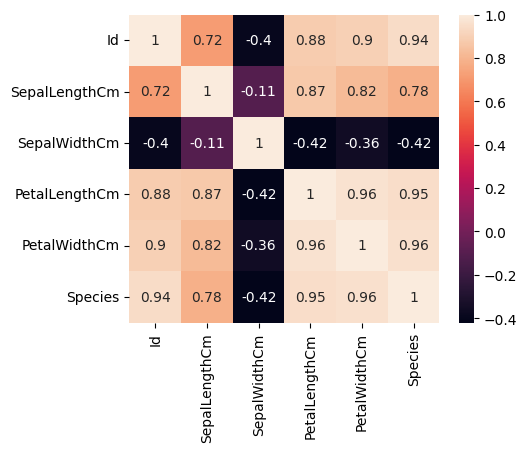

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)